# Macierze - podsumowanie

* tworzenie macierzy i indeksowanie elementów macierzy
* operacje macierzowe i funkcje działające na macierzach
* macierze logiczne i operacje na macierzach logicznych
* optymalizacja kodu
 * wektoryzacja - zamiana pętli po elementach na mechanizmy indeksowania
 * prealokacja - dynamiczne modyfikowanie rozmiarów macierzy jest kosztowne



## Operacje na macierzach


Operator | Opis | Operator | Opis | 
:-|:-|:-|:-|
`A + B` | dodawanie| `A .+ B` | dodawnie |
`A - B` | odejmowanie| `A .- B` | odejmowanie |
`A * B` | iloczyn macierzy| `A .* B` | mnożenie elementów |
`A / B` | dzielenie macierzy $A B^{-1}$  (rozwiązanie $xA=B$)| `A ./ B` | dzielenie elementów |
`A \ B` | dzielenie macierzy $A^{-1}B $ (rozwiązanie $Ax=B$) | `A .\ B` | dzielenie elementów |
`A'` | transpozycja (sprzężona)| `A.'` transpozycja | 
`A ^ n` | potęgowanie macierzy (`A * A * ... * A`)| `A.^B` | potegowanie elementami |



## Funkcje tworzące macierze

Funkcja | Opis |
:-|:-|
`zeros(N, M)` | macierz zerowa |
`ones(N, M)` | macierz z jedynkami |
`eye(N, M)` | macierz tożsamożsciowa z 1 na diagonali |
`rand(N, M)` | macierz z wartościami losowymi z rozkładu jednostajnego $[0,1]$ |
`randn(N, M)` | macierz z wartościami losowaymi z rozkladu normalnego $N(0,1)$ |
`linspace(A, B, K)` | wektor $K$ puntów na odcinku $[A,B]$ |



## Funkcje macierzowe


Funkcja | Opis |
:-|:-|
`reshape(A, N, M)` | zmiana wymiarów macierzy |
`length(A)`       | ilość elementów wektora lub najdłuższy wymiar macierzy |
`size(A)`         | ilość wierszy i kolumn macierzy |
 `numel(A)`       | ilość elementów |
`trace(A)`        | ślad macierzy |
`det(A)`          | wyznacznuk macierzy |
`rank(A)`         | rząd macierzy |
`inv(A)`          | odwrócenie macierzy $A^{-1}$ |



**Ćwiczenie** Rozwiąż układ równań $Ax=b$
$$
\left\{\begin{array}{l}
x+2 y+3 z=1 \\
4 x+5 y+6 z=1 \\
7 x+8 y \quad=1
\end{array}\right.
$$
1. rozwiązaując równanie $x = A^{-1}b$
2. za pomoca operatora `\`


## Macierze i funkcje

Wiele funkcji Matlaba $f(x)=y$ jest przystosowana do działania na macierzach o dowolnych kształtach


In [1]:
X = reshape(1:24, 4, 6)

a = sin(X)
b = cos(X) .* sin(a)

X =

    1    5    9   13   17   21
    2    6   10   14   18   22
    3    7   11   15   19   23
    4    8   12   16   20   24

a =

   0.8414710  -0.9589243   0.4121185   0.4201670  -0.9613975   0.8366556
   0.9092974  -0.2794155  -0.5440211   0.9906074  -0.7509872  -0.0088513
   0.1411200   0.6569866  -0.9999902   0.6502878   0.1498772  -0.8462204
  -0.7568025   0.9893582  -0.5365729  -0.2879033   0.9129453  -0.9055784

b =

   0.4028624  -0.2321985  -0.3649544   0.3701593   0.2256318  -0.4066379
  -0.3283700  -0.2648091   0.4342873   0.1143614  -0.4505742   0.0088508
  -0.1392445   0.4604334  -0.0037241  -0.4599269   0.1476301   0.3989750
   0.4487919  -0.1215905  -0.4313727   0.2719202   0.3229186  -0.3337365



**Ćwiczenie** popraw program `pole_kola.m` tak aby funkcja zwracała poprawny wynik dla argumentu macierzowego. Wynikiem funkcji będzie macierz zawierająca w każdym z elementów  $P_{ij}$ wartość pola dla promienia $R_{ij}$.
Postaraj się nie korzystać z instrukcji pętli. 

**Ćwiczenie** zmierz czas wykonywania poniższych instrukcji.
* porównaj szybkość działania przy zastosowaniu prealokowanego wektora `x`
* przyśpiesz działanie stosując wektoryzację (pozbądź się instrukcji pętli)

In [2]:
n=100000
tic
for i=1:n
    x(i) = sqrt(i);
end
toc
sum(x)

n =  100000
Elapsed time is 0.449781 seconds.
ans =  21082008.97392


## Wektory i macierze logiczne

* macierze zawierające wartości logiczne (typ `logical`), wartość `0` to fałsz, wartość `1` (lub niezerowa) to prawda
* indeksowanie macierzy za pomocą macierzy logicznych
* funkcje `false()` i `true()` pozwalają tworzyć macierze logiczne
* funkcja `logical()` zamienia macierz liczbową na logiczną

In [3]:
X = [1 , -5, 7 ; -1, 42, -12]
ind = X < 0
whos ind

X =

    1   -5    7
   -1   42  -12

ind =

  0  1  0
  1  0  1

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        ind         2x3                          6  logical

Total is 6 elements using 6 bytes



In [4]:
# indeksowanie macierzą logiczną
a = X(ind)    
b = X( X > 0 )
X( X > 0) = 111

a =

   -1
   -5
  -12

b =

    1
   42
    7

X =

   111    -5   111
    -1   111   -12



In [5]:
A = true(2)
B = false(2, 3)
whos A B

A =

  1  1
  1  1

B =

  0  0  0
  0  0  0

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        A           2x2                          4  logical
        B           2x3                          6  logical

Total is 10 elements using 10 bytes



In [6]:
# wartości logiczne mogą być traktowane jak liczby całkowite
C = A + 1
whos A C

C =

   2   2
   2   2

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        A           2x2                          4  logical
        C           2x2                         32  double

Total is 8 elements using 36 bytes



**Ćwiczenie** dlaczego poniższe wyrażenie nie działa? Spróbuj to naprawić.

In [7]:
w = 1:5;
w([1 0 1 0 1]) = -1

error: w(0): subscripts must be either integers 1 to (2^63)-1 or logicals


## Przydatne funkcje operujące na wartościach logicznych

Funkcja | Opis |
:-|:-|
`any()` | zwraca 1 gdy wektor posiada niezerowy element |  
 | dla macierzy zwraca wektor z wartością 1 gdy w kolumnie jest niezerowa wartość   |
`all()` | zwraca 1 dla każdej kolumny której wszystkie elementy są niezerowe |
`find()` | zwraca indeksy (indeksowanie liniowe) niezerowych elementów |
`isequal()` | sprawdza czy macierze mają jednakowe elementy |
`isnan()`  | sprawdza czy w macierzy są elementy `NaN`  |


In [8]:
w1 = [ 0 0 1 2 ];
w2 = zeros(1,10);

a = all(w1)
b = any(w1)

c = all(w2)
d = any(w2)

a = 0
b = 1
c = 0
d = 0


In [9]:
E = [ 1 2 ; 0 0 ; 3 * eye(2)]'
all(E)
any(E)

E =

   1   0   3   0
   2   0   0   3

ans =

  1  0  0  0

ans =

  1  0  1  1



In [10]:
# indeksy liniowe
k = find(E)
a = E(k)

k =

   1
   2
   5
   8

a =

   1
   2
   3
   3



In [11]:
# indeksy wierszy i kolumn
[w k] = find(E)

w =

   1
   2
   1
   2

k =

   1
   1
   3
   4



In [12]:
# szukanie zerowych elementów
k2 = find(~E)

k2 =

   3
   4
   6
   7



In [13]:
# szukanie elementów spełniających warunki
k3 = find(E > 2)

k3 =

   5
   8



In [14]:
X = E
isequal(E, X)

% to samo za pomocą funkcji all()
all(all(X == E))   

X(1,1) = -X(1,1)
isequal(E, X)
all(all(X == E))   


X =

   1   0   3   0
   2   0   0   3

ans = 1
ans = 1
X =

  -1   0   3   0
   2   0   0   3

ans = 0
ans = 0


## Operatory logiczne

Operator | Opis |
:-|:-|
`A < B` | mniejszy niż |
`A > B` | większy niż |
`A <= B` | mniejszy lub równy |
`A >= B` | wiekszy lub równy  |
`A == B` | równy sobie |
`A ~= B` | rózny od siebie |
`A & B` | aperator AND elementami |
`A \| B` | operator OR elementami |
`~A `   | Operator NOT |



In [15]:
X = magic(5)
X(X > 5 & X < 10)


X =

   17   24    1    8   15
   23    5    7   14   16
    4    6   13   20   22
   10   12   19   21    3
   11   18   25    2    9

ans =

   6
   7
   8
   9



**Ćwiczenie** utwórz macierz `X` o wymiarach 10x10 posiadającą losowe wartości z zakresu od -1 do 1. 
Następnie zastąp wszystkie elementy o wartości ujemnej w macierzy `X` liczbą `0`.

## Statystyki opisowe

Funkcja | Pis |
:-|:-|
`min` | minimum (w kolumnach)|
`max` | maksimum (w kolumnach) |
`bounds` | Największy i najmniejszy element |
`mean`	| wartość średnia |
`std`	| odchylena standardowe |
`median` | mediana |
`mode` |	wartość modelana |
`var` |	warianscja |
`kurtosis` | kurtoza |
`skewnes` | skośność |


In [96]:
X = randn(3,5)

a = min(X)

% minimim w wierszach
a1 = min(X, [], 2)

% minimim parami elementów
a2 = min(X, zeros(size(X)))

b = mean(X)

# ścrednia w wierszach
b1 = mean(X, 2)

c = std(X)
d = median(X)
e = mode(X)

X =

   1.79888   1.41353  -0.77184  -0.81686   1.31108
  -0.91412  -0.22773  -3.07851   0.91659   0.73920
  -1.65742  -0.22590  -0.54652  -2.04194   0.56951

a =

  -1.65742  -0.22773  -3.07851  -2.04194   0.56951

a1 =

  -0.81686
  -3.07851
  -2.04194

a2 =

   0.00000   0.00000  -0.77184  -0.81686   0.00000
  -0.91412  -0.22773  -3.07851   0.00000   0.00000
  -1.65742  -0.22590  -0.54652  -2.04194   0.00000

b =

  -0.25755   0.31997  -1.46562  -0.64740   0.87326

b1 =

   0.58696
  -0.51291
  -0.78045

c =

   1.81929   0.94705   1.40134   1.48653   0.38854

d =

  -0.91412  -0.22590  -0.77184  -0.81686   0.73920

e =

  -1.65742  -0.22773  -3.07851  -2.04194   0.56951



**Ćwiczenie** wczytaj dane `carsmall` i wykonaj następujące operacje:
* sprawdź, czy zmienne dane zawierają wartości brakujące (oznaczone jako `NaN`) 
* usuń wartości brakujące ze zminnnej `MPG` i wyznacz wartość średnią
* wysnacz wartość średnią `MPG` dla samochodów z roku 82 (`Model_year`)

Dane dla OCtave: https://www.fizyka.umk.pl/~grochu/pp2/carsmall.mat

## Wykresy 

* `plot(x,y)`  liniowy (wykres rozrzutu)
* `hist(x)`  histogram
* `boxplot(x)` skrzynkowy
* `bar(x)` słupkowy
* `pie(x)` kołowy

In [9]:
load carsmall
whos
% plik z danymi (dla OCtave) https://www.fizyka.umk.pl/~grochu/pp2/carsmall.m

Variables in the current scope:

   Attr Name              Size                     Bytes  Class
   ==== ====              ====                     =====  ===== 
        Acceleration    100x1                        800  double
        Cylinders       100x1                        800  double
        Displacement    100x1                        800  double
        Horsepower      100x1                        800  double
        MPG             100x1                        800  double
        Mfg             100x13                      1300  char
        Model           100x33                      3300  char
        Model_Year      100x1                        800  double
        Origin          100x7                        700  char
        Weight          100x1                        800  double
        ans               7x3                        168  double

Total is 6021 elements using 11068 bytes



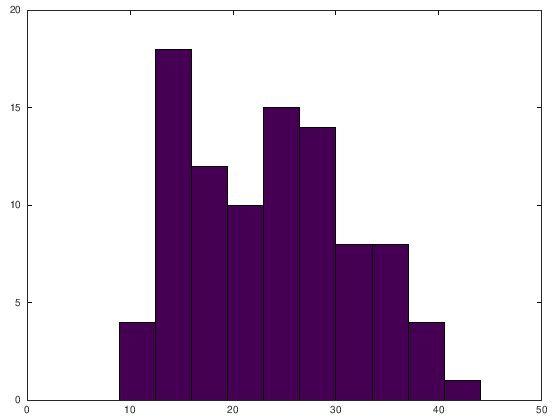

In [10]:
hist(MPG)

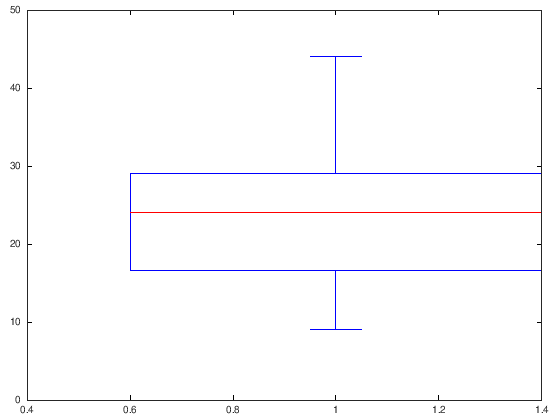

In [13]:
boxplot(MPG);
% w octave moze byc wymagane dointalowanie pakietu statystycznego
% pkg load statistics

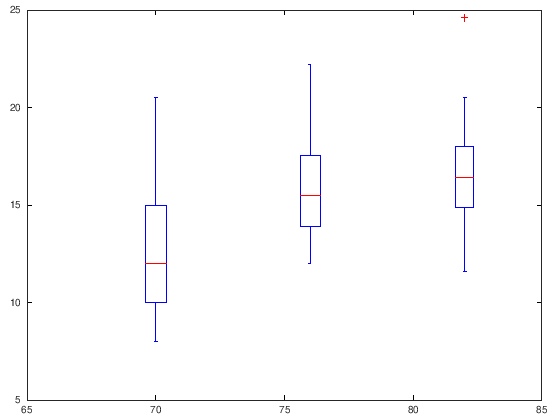

In [12]:
boxplot(Acceleration, Model_Year);

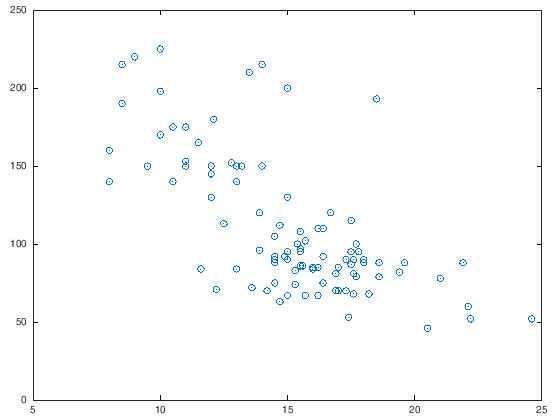

In [15]:
plot(Acceleration, Horsepower, 'o')

ans =

   4
   6
   8



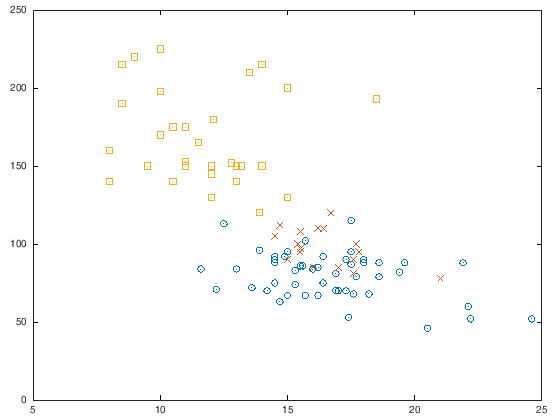

In [28]:
unique(Cylinders)

plot(Acceleration(Cylinders == 4), Horsepower(Cylinders==4), 'o')
hold on 
plot(Acceleration(Cylinders == 6), Horsepower(Cylinders==6), 'x')
plot(Acceleration(Cylinders == 8), Horsepower(Cylinders==8), 's')

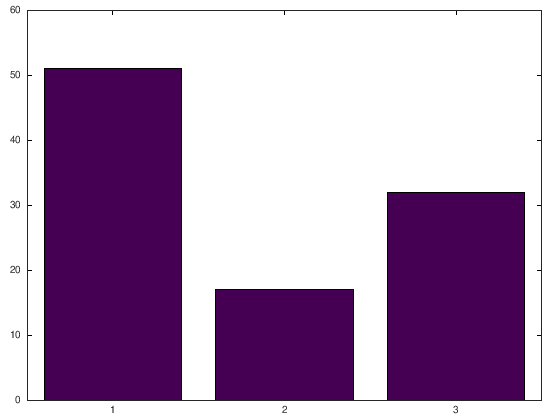

In [29]:
bar([sum(Cylinders == 4) sum(Cylinders == 6) sum(Cylinders == 8)])

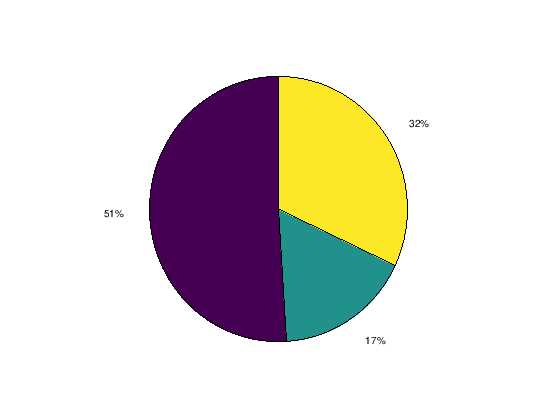

In [30]:
pie([sum(Cylinders == 4) sum(Cylinders == 6) sum(Cylinders == 8)])

**Ćwiczenie** wygeneruj wektor zawierający 1000 wartości z roskładu normalengo o średniej 5 i odchyleniu standardowym 10.
* narysuj histogram
* wysnacz wartość średnią $\mu$, odchylenie standardowe $\sigma$
* dodaj do wykresu z hostpgramem wykres prezentujący funkcję roskładu normalnego $N(\mu, \sigma) = A \cdot \exp \left(\frac{-(x-\mu)^{2}}{2 \sigma^{2}}\right)$

## Zadanie 6 Regresja liniowa

Napisz funkcję o nazwie `regresja`, która dla danych werktowów $x$ i $y$ zwróci współczynniki $a$ i $b$ okreslające linię prostą $y = a x + b$ dopasowaną do danych $x$ i $y$ za pomocą metody najmniejszych kwadratów. 

Dla danych $x_i$ i $y_i$ wspólczyniki $a$ i $b$ wyznacz ze wzoru:

$$
a=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}
$$

$$
b=\bar{y}-a \bar{x}
$$
gdzie $\bar{x}$ i $\bar{y}$ to wartości średnie zmiennych.

Argumentami funkcji są dwa werktory $x$ i $y$. Jeżeli rozmiary wektorów nie zgadzają się, funkcja zwraca stosowany komunikat błedu oraz przerywa swoje działanie. Jeżeli użytkownik poda za mało lub za dużo argumentów, wówczas funkcja również zwraca odpowiedni komunikat z błędem i konczy swoje działanie. Do wypisania komunikatów z będęm wykorzystaj funkcję `error()`.

Przykład działania funkcji:


a =  2.0188
b = -9.8962


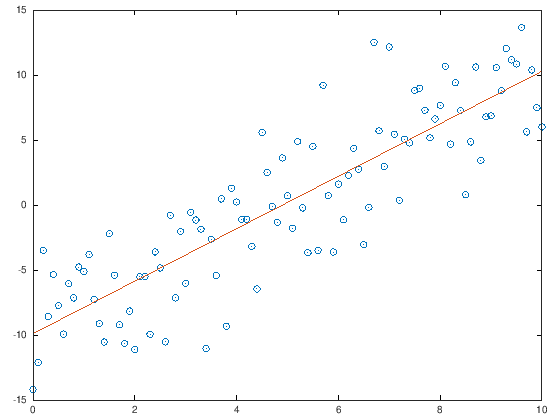

In [16]:
x = 0:.1:10;
y = 2 * x - 10;

% dodajemy troche szumu
y = y + 3*randn(size(x));

[a b] = regresja(x, y)

plot(x, y, 'o');
hold on
plot(x, a*x+b,'-');
 